In [59]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score


In [60]:
df  = pd.read_csv("boston.csv", index_col = 0)


In [61]:
# split into input and target variables
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values.reshape(-1, 1)

# scale the input features
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [62]:
X.shape

(506, 13)

In [63]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 25)

In [64]:
class ANNRegressor:
    def __init__(self, n_input, n_hidden, n_output):
        self.weights1 = np.random.randn(n_input, n_hidden)
        self.bias1 = np.zeros((1, n_hidden))
        self.weights2 = np.random.randn(n_hidden, n_output)
        self.bias2 = np.zeros((1, n_output))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def relu(self, x):
        return np.maximum(0, x)

    def forward(self, X):
        self.z1 = np.dot(X, self.weights1) + self.bias1
        self.a1 = self.sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.weights2) + self.bias2
        self.y_hat = self.relu(self.z2)
        return self.y_hat

    def backward(self, X, y, y_hat, learning_rate):
        m = X.shape[0]
        error = y_hat - y
        delta2 = error
        d_weights2 = np.dot(self.a1.T, delta2)
        d_bias2 = np.sum(delta2, axis=0, keepdims=True)
        delta1 = np.dot(delta2, self.weights2.T) * self.a1 * (1 - self.a1)
        d_weights1 = np.dot(X.T, delta1)
        d_bias1 = np.sum(delta1, axis=0)

        # Update the weights and biases
        self.weights1 -= learning_rate * d_weights1 / m
        self.bias1 -= learning_rate * d_bias1 / m
        self.weights2 -= learning_rate * d_weights2 / m
        self.bias2 -= learning_rate * d_bias2 / m

    def train(self, X, y, n_epochs, learning_rate):
        for i in range(n_epochs):
            y_hat = self.forward(X)
            self.backward(X, y, y_hat, learning_rate)

In [65]:
# Initialize the neural network with 13 input nodes, 5 hidden nodes, and 1 output node
n_input = X_train.shape[1]
n_hidden = 5
n_output = 1
nn = ANNRegressor(n_input, n_hidden, n_output)

# Train the neural network and evaluate its performance on the test set
learning_rate = 0.01
n_epochs = 1000

In [66]:
nn.train(X_train, y_train, n_epochs, learning_rate)
y_pred = nn.forward(X_test)
mse = np.mean((y_pred - y_test) ** 2)
print("Mean Squared Error:", mse)

Mean Squared Error: 14.755433315436255


In [67]:
r2_score(y_test, y_pred)

0.8041641739639194

In [69]:
# define the range of hyperparameters to search
n_hidden_list = [3, 5, 7]
learning_rate_list = [0.01, 0.05, 0.1]

# initialize variables to keep track of the best hyperparameters and performance
best_n_hidden = None
best_learning_rate = None
best_score = float('-inf')

# loop through all possible combinations of hyperparameters
for n_hidden in n_hidden_list:
    for learning_rate in learning_rate_list:
        
        # initialize the neural network with the current hyperparameters
        nn = ANNRegressor(n_input, n_hidden, n_output)

        # train the neural network
        nn.train(X_train, y_train, n_epochs, learning_rate)

        # evaluate the performance on the test set
        y_pred = nn.forward(X_test)
        score = r2_score(y_test, y_pred)

        # check if the current hyperparameters are the best so far
        if score > best_score:
            best_score = score
            best_n_hidden = n_hidden
            best_learning_rate = learning_rate

# print the best hyperparameters and performance
print("Best number of hidden nodes:", best_n_hidden)
print("Best learning rate:", best_learning_rate)
print("Best R2 score:", best_score)


Best number of hidden nodes: 7
Best learning rate: 0.1
Best R2 score: 0.8638998573552035


In [70]:
import matplotlib.pyplot as plt

In [92]:
# Manual Algorithm
nn = ANNRegressor(n_input, n_hidden, n_output)
nn.train(X_train, y_train, n_epochs, learning_rate)
y_pred = nn.forward(X_test)
r2_manual = r2_score(y_test, y_pred)

In [93]:
# Manual Algorithm with Hyperparameter Tuning
nn = ANNRegressor(n_input, 10, n_output) # change number of hidden nodes
nn.train(X_train, y_train, n_epochs, learning_rate)
y_pred = nn.forward(X_test)
r2_manual_tuned = r2_score(y_test, y_pred)


In [94]:
# Keras Algorithm
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(10, input_dim=n_input, activation='relu'))
model.add(Dense(n_output))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=0)
y_pred = model.predict(X_test)
r2_keras = r2_score(y_test, y_pred)


5/5 [==============================] - 0s 2ms/step


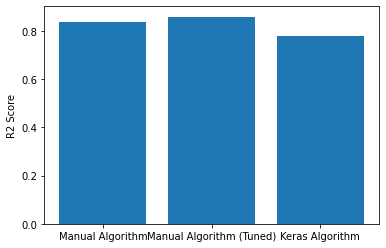

In [96]:
# Plot the results
models = ['Manual Algorithm', 'Manual Algorithm (Tuned)', 'Keras Algorithm']
r2_scores = [r2_manual, r2_manual_tuned, r2_keras]
plt.bar(models, r2_scores)
plt.ylabel('R2 Score')
plt.show()
